In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.listdir('../RAW_DATA/')

['conso_energie_finale_vaud.xlsx',
 '.DS_Store',
 'renewable_power_plants_CH.csv',
 'IDC_canton_geneve_2010.xlsx',
 'indice_moyen.csv',
 'oil_price_evolution.xls',
 'conso_elec_vaud.xlsx',
 'degré.jour_geneve.xlsx',
 'CO2-emissions.xlsx',
 'conventional_power_plants_CH.csv',
 'OFS']

In [16]:
df=pd.read_excel(os.path.join('../RAW_DATA/conso_energie_finale_vaud.xlsx'))
df=df.T
df.dropna('columns',inplace=True)
df=df.astype(int)
df.drop('Produits pétroliers (TJ)',axis=1,inplace=True)

In [17]:
df

,Combustibles pétroliers (TJ),Carburants (TJ),Electricité (TJ),Gaz (TJ),Charbon (TJ),Bois (TJ),Chaleur à distance (TJ),Déchets (TJ),Total (TJ)
1996,20809,16942,11901,9595,8,1281,1187,580,62304
1997,19481,17087,11806,9243,4,1244,1098,574,60537
1998,20421,17488,12130,9300,3,1202,1196,505,62246
1999,19615,18831,12440,10160,3,1416,1134,534,64134
2000,17763,19081,12449,10158,725,1593,1109,579,63459
2001,19698,19035,12756,10201,647,1591,1171,1162,66262
2002,18365,19061,12844,10441,414,1669,1147,1164,65105
2003,19267,19161,13202,10814,804,1521,1169,1257,67196
2004,19068,19075,13467,11606,202,1581,1230,1611,67841
2005,19249,18832,13784,11978,188,1398,1216,1528,68174


<IPython.core.display.Javascript object>


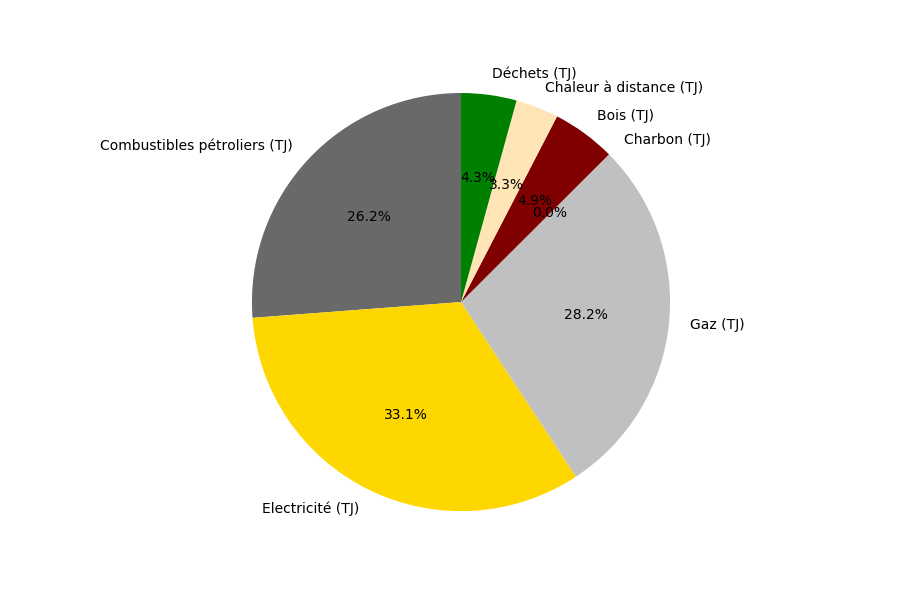

(-1.1084144949913024,
 1.1107827067375182,
 -1.1094178974628448,
 1.1004484713077545)

In [71]:
%matplotlib notebook
labels=df.drop(['Total (TJ)','Carburants (TJ)'],axis=1).columns.tolist()
fracs=df[df.index==2015].drop(['Total (TJ)','Carburants (TJ)'],axis=1)/(64952-19526)
colors=['dimgrey','gold','silver','black','maroon','moccasin','green']
plt.figure('Part des agents énergétiques dans la consommation finale du Canton de Vaud en 2015',figsize=(9,6))
plt.pie(fracs.T,labels=labels,colors=colors,startangle=90,autopct='%.1f%%')
plt.axis('equal')

<IPython.core.display.Javascript object>


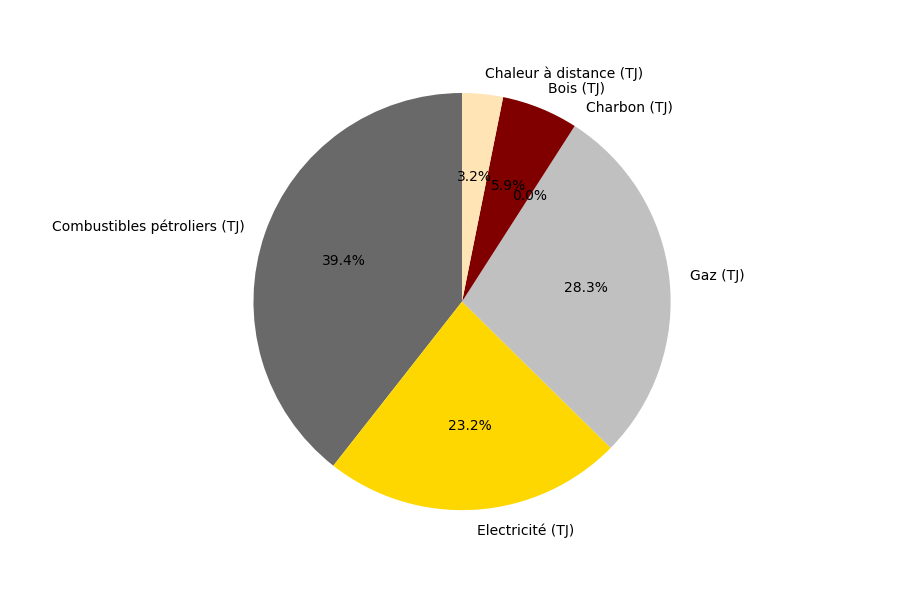

(-1.1194306565118721,
 1.1117575585619652,
 -1.1143777477229353,
 1.1006846546534732)

In [93]:
factor=[0.6,0.28,0.4,0,0.48,0.38]
labels=df.drop(['Total (TJ)','Carburants (TJ)','Déchets (TJ)'],axis=1).columns.tolist()
fracs=df[df.index==2015].drop(['Total (TJ)','Carburants (TJ)','Déchets (TJ)'],axis=1)/(64952-19526)
colors=['dimgrey','gold','silver','black','maroon','moccasin']
plt.figure('Part des agents énergétiques dans la conso. finale des ménages',figsize=(9,6))
plt.pie(fracs.T[2015]*factor/sum(fracs.T[2015]*factor),labels=labels,colors=colors,startangle=90,autopct='%.1f%%')
plt.axis('equal')

In [87]:
fracs.T[2015]*factor/sum(fracs.T[2015]*factor)

Combustibles pétroliers (TJ)    0.394155
Electricité (TJ)                0.232106
Gaz (TJ)                        0.282947
Charbon (TJ)                    0.000000
Bois (TJ)                       0.059208
Chaleur à distance (TJ)         0.031584
Déchets (TJ)                    0.000000
Name: 2015, dtype: float64